# <span style='background :aquamarine' > PROGETTO MACHINE LEARNING </span>

### <span style='font-family:"font_family name"'> <span style=''> In questo progetto andremo ad utilizzare il dataset "wine" che scikit-learn ci mette a disposizione, esso contiene i risultati dell’analisi chimica di vini prodotti da tre diversi coltivatori Italiani. L'obiettivo sarà quello di scegliere un modello di apprendimento  e di valutarne le performance nell'identificare di quale vino si tratta.

In [584]:
# importo le librerie
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import set_config
set_config(display='diagram')

In [585]:
wine= datasets.load_wine() # scarico il dataset in una variabile

In [586]:
print(wine.DESCR) # descrizione del dataset

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [587]:
# con pandas creo un dataframe per visualizzarne meglio le caratteristiche del dataset
df = pd.DataFrame(wine.data,columns=wine.feature_names)
df['label']= wine.target

In [588]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [589]:
# non ci sono dati nulli 
# le features sono tutte numeriche e sono archiviate sotto il giusto tipo
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [590]:
# il dataset è ben bilanciato, non ci sono sproporzioni nelle 3 classi della label che dobbiamo classificare
df['label'].value_counts()

1    71
0    59
2    48
Name: label, dtype: int64

In [591]:
# notiamo che le features sono si numeriche, ma presentano ordini di grandezze differenti (faremo una scalatura))
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [592]:
# non ci sono esempi duplici
df.duplicated().sum()

0

In [593]:
# separiamo le features e il target, e le dividiamo in train e test 
#(il dataset è molto semplice perciò proveremo ad utilizzare solo il 60% dei dati per il train)
X= df.drop('label',axis=1)
y= df['label']
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.6,random_state=0)

In [594]:
#creiamo una pipeline che avrà come primo step la standardizzazione e come secondo step l'algoritmo scelto (SVC)
pipe= make_pipeline(StandardScaler(),SVC(random_state=0))

In [595]:
# addestriamo il modello seguendo gli step della pipeline
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [596]:
# utilizziamo la funzione score() per ottenere l'accuratezza sia del train set e sia del test set
#l'accuratezza dato che il dataset è bilanciato può essere considerata una buona metrica
# il modello ottiene delle ottime performance sia sul train e che sul test
acc_test=pipe.score(X_test,y_test)
print(f'Accuratezza test {acc_test}')
acc_train=pipe.score(X_train,y_train)
print(f'Accuratezza train {acc_train}')

Accuratezza test 0.9861111111111112
Accuratezza train 1.0


<AxesSubplot:>

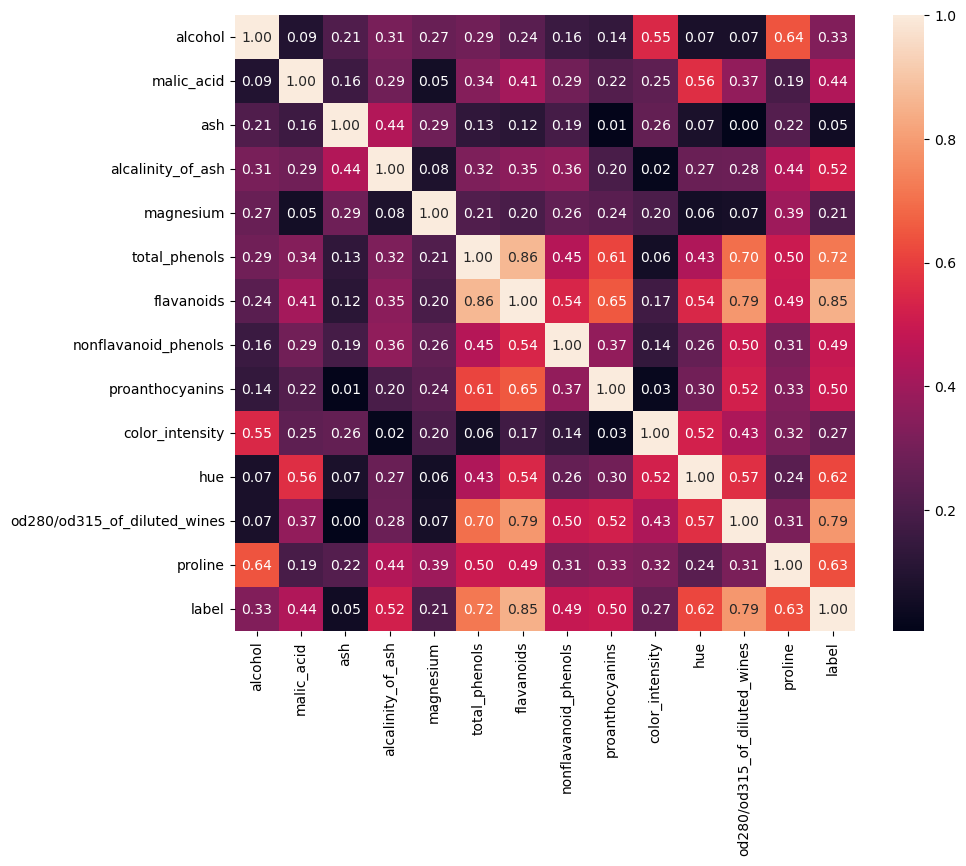

In [597]:
# creiamo una matrice di confusione per vedere se c'è relazione tra le features
corr=df.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f')

In [598]:
# 3 features presentano un'alta correlazione lineare, così decido di eliminarne 2 e di rivalutare le performance
select_X= X.drop(['total_phenols','od280/od315_of_diluted_wines'],axis=1)
X_train,X_test,y_train,y_test= train_test_split(select_X,y,train_size=0.6,random_state=0)

In [599]:
sel_pipe= make_pipeline(StandardScaler(),SVC(random_state=0))

In [600]:
sel_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [601]:
# i risultati ottenuti sono molto simili, quindi eliminare le due features non ha avuto una grande rilevanza
acc_test=sel_pipe.score(X_test,y_test)
print(f'Accuratezza test {acc_test}')
acc_train=sel_pipe.score(X_train,y_train)
print(f'Accuratezza train {acc_train}')

Accuratezza test 0.9722222222222222
Accuratezza train 1.0


In [602]:
# vediamo i parametri di default di SVC
svc = SVC(random_state=0)
params = svc.get_params()
params_df = pd.DataFrame(params, index=['Default'])
params_df.T

,Default
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


In [603]:
#Validiamo gli iperparametri di SVC attraverso la cross-validation, in questo caso useremo StratifiedKFold,
#in modo tale che ogni classe sia sempre rappresentata in modo proporzionato in ogni "subset" che verrà
#usato sia per l'addestramento che per il test

#.Useremo quindi GridSearchCV che darà agli iperparametri diversi valori ad ogni addestramento e
# che applicherà in modo automatico quelli che risulteranno i migliori
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
param_grid={'svc__kernel':['rbf', 'poly', 'sigmoid','linear'],
            'svc__degree':[1,2,3,4,5,6],
            'svc__C':[0.0001,0.001,0.01,0.1,1],
            'svc__gamma':[0.01,0.1,1,10,100]}
grid= GridSearchCV(estimator=sel_pipe,cv=cv,param_grid=param_grid)
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=0))]),
             param_grid={'svc__C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'svc__degree': [1, 2, 3, 4, 5, 6],
                         'svc__gamma': [0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [604]:
print(f'I migliori parametri sono {grid.best_params_}')
print(f'Accuratezza test {grid.score(X_test,y_test)}')
print(f'Accuratezza train {grid.score(X_train,y_train)}')

I migliori parametri sono {'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Accuratezza test 0.9861111111111112
Accuratezza train 1.0


C:\Users\Matteo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


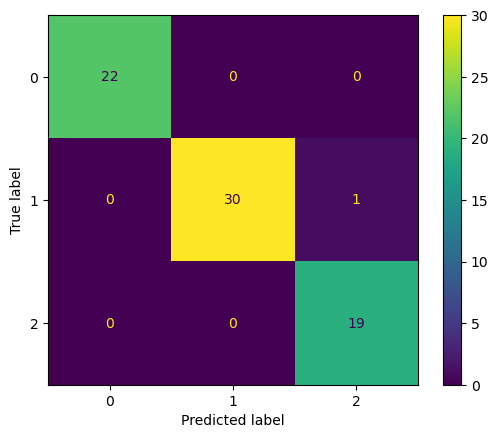

In [605]:
# Otteniamo ovviamente ancora delle ottime performance con un leggerissimo miglioramento sul test set
# visualizzamo una matrice di confusione, per vedere gli errori
# solo un esempio è stato classificato in modo errato
plot_confusion_matrix(grid,X_test,y_test)